## Elastic Net
Jonathan Cruz y Germán Villar

Bibliografía:

[Zou & Hastie (2003) - "Elastic Net"](https://web.stanford.edu/~hastie/Papers/elasticnet.pdf)

[Hastie, Tibshiranie & Friedman (2009) - "Elements of Statistical Learning"](http://statweb.stanford.edu/~tibs/ElemStatLearn/)

[Lobert, Eis & Costina (2010) - "Exploiting Covariate Similarity in Sparse Regression via the
Pairwise Elastic Net"](http://machinelearning.wustl.edu/mlpapers/paper_files/AISTATS2010_LorbertEKBR10.pdf)


Elastic Net es un método de regularización y selección de variables creado a partir de Ridge Regression y Lasso. 
  * Resuelve el problema de sobrediscriminación que realiza Lasso mediante el efecto de agrupamiento de Ridge. 
  * Por lo anterior, es un método útil para el caso $p>>n$

## Naive Elastic Net
Suponemos un conjunto de datos con $n$ observaciones con $p$ predictores. Sea $y= (y_{1},...,y_{n})^{T}$ (las respuestas) y $X = \{x_{1},\cdots, x_{p}\}$ la matriz del modelo, donde $x_{j}=(x_{1j},...,x_{nj})^{T}$, $ j=1,...,p$ son los predictores. Después de centrar y estandarizar los predictores. 

Para algún no-negativo $\lambda_{1}$ y $\lambda_{2}$, definimos el criterio de naive elastic net:
$$ L (\lambda_{1}, \lambda_{2}, \beta)=|y-X\beta|^{2} + \lambda_{2}|\beta|^{2} + \lambda_{1}|\beta|_{1}$$
Donde: $$|\beta|^{2} = \sum_{j=1}^{p} \beta_{j}^{2} $$ y $$ |\beta|_{1}= \sum_{j=1}^{p} |\beta_{j}|  $$
Por lo tanto, el estimador de "naive elastic net" es:
$$ \hat{\beta} = {argmin}_{\beta} L(\lambda_{1}, \lambda_{2}, \beta) $$

El método anterior se puede enter como un método de OLS penalizador. 

Por lo tal, sea  $\alpha= \frac {\lambda_{2}} {\lambda_{1} + \lambda_{2}}$, entonces podemos replantear el problema de optimización por: 

$$ \hat{\beta} = {argmin}_{\beta} |Y-X\beta|^{2} $$
S.t. $(1-\alpha)|\beta|_{1} + \alpha |\beta|^{2} \leq t $ para algún $t$.

### Geometría de la penalización de Elastic Net

Podemos llamar a $(1-\alpha)|\beta|_{1} + \alpha |\beta|^{2} \leq t $ la penalización de elastic net, la cual es una combinación convexa de Lasso y Ridge penalty. Cuando $\alpha = 1$ the naive elastic net es una regresión simple de ridge. 

Asumimos $\alpha < 1$, $\forall \alpha \in [0,1)$, cuando $\alpha=0$ la función no tiene primera derivada y $\forall \alpha > 0$ es una función estrictamente convexa, es decir, Naive Elastic Net es una combinación lineal de Ridge y Lasso.  



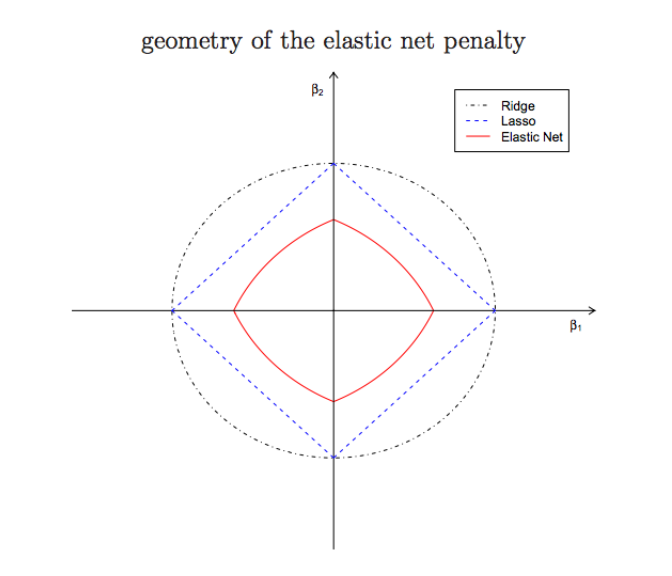

In [120]:
from IPython.display import Image
Image(filename='Geometria.png')

## Corrección por sesgo (Elastic Net)
El método de Elastic Net hace simultáneamente la selección de varibles (reduciendo o quitando las menos importantes), además de que selecciona los grupos de variables seleccionadas.

$$ \hat{\beta}^{*} = {argmin_{\beta}} |y^{*} - X^{*} \beta^{*}| ^{2}+ \frac {\lambda_{1}} {\sqrt{1+\lambda_{2}}} |\beta^{*}|_{1}$$
$$ \hat{\beta}_{e n}=\sqrt{1+\lambda_{2}}\hat{\beta^{*}} $$ 
$$ \hat{\beta}_{n e n}=\frac{1}{\sqrt{1+\lambda_{2}}}\hat{\beta^{*}} $$ 
$$ \hat{\beta}_{e n} = (1+\lambda_{2}) \hat{\beta}_{n e n}$$ 

El método de Elastic Net es una reescala del método de Naive Elastic Net, en donde se conservan las propiedades de este último con la única diferencia que Elastic Net corrije el "double shrinkage" originado por NET y, así, reduce el sesgo. 




La justificación principal para $(1+\lambda_{2})$ la reescala viene de la descomposición del operador de Ridge. Donde los predictores $X$ están estandarizados, tenemos:

$$ X'X= 
\begin{bmatrix}
1 & \rho_{12} & \rho_{13}&\cdots & \rho_{1p}           \\[0.3em]
   & 1 & \rho_{23} & \cdots& \rho_{2p}                   \\[0.3em]
       &    & \ddots &    &   \vdots        \\[0.3em]
      &    &  &  1  &   \rho_{p-1,p}       \\[0.3em]
     & &   &         &      1
     \end{bmatrix} $$
     
$$ \hat{\beta_{Ridge}}= \mathbf{R} \mathbf{y} $$
$$ R= \frac {1}{1+\lambda_{2}}R^{*}=\frac {1}{1+\lambda_{2}}
\begin{bmatrix}
1 & \frac {\rho_{12}}{1+\lambda_{2}} & \frac {\rho_{13}}{1+\lambda_{2}}&\cdots & \frac {\rho_{1p}}{1+\lambda_{2}}    \\[0.3em]
   & 1 & \frac {\rho_{23}}{1+\lambda_{2}} & \cdots& \frac {\rho_{2p} }{1+\lambda_{2}}                  \\[0.3em]
       &    & \ddots &    &   \vdots        \\[0.3em]
      &    &  &  1  &   \frac {\rho_{p-1,p}}{1+\lambda_{2}}       \\[0.3em]
     & &   &         &      1
     \end{bmatrix}^{-1}
X^{T}$$

# Diferencias entre Lasso, Ridge y Elastic Net

a) Por un lado, Ridge Regression no discrimina variables, por lo que no podemos obtener un modelo parsimonioso a partir de este método; sin embargo, posee un efecto de agrupación de variables.

b) Por otro lado, Lasso discrimina variables por completo y puede arrojar un modelo parsimonioso. El problema es que Lasso llevará a cero parámetros de variables con el mismo poder predictivo. 

Elastic Net es una combinación lineal entre ambos mediante la norma $\alpha$ y, por tanto, discrimina por grupos. 


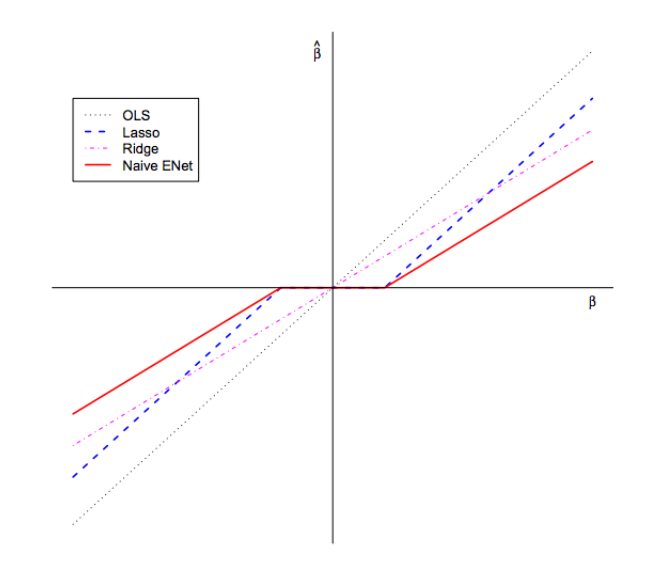

In [119]:
from IPython.display import Image
Image(filename='picexactsolutions.png')

# Veamos cómo se hace en Python

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data_cr = pd.read_excel('Credit (1).xlsx')

nobs    = data_cr.shape[0]
saldo    = np.asarray(data_cr.Balance).reshape((nobs,1))
male     = np.asarray(data_cr.Gender==' Male').reshape((nobs,1))
student  = np.asarray(data_cr.Student=='Yes').reshape((nobs,1))
married  = np.asarray(data_cr.Married=='Yes').reshape((nobs,1))
eth_dum  = np.asarray(pd.get_dummies(data_cr.Ethnicity))[:,:-1]
oth_xmat = data_cr[[u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education']]

labs_x = np.array([u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education',
              'Hombre','Estudiante','Casado','Caucasian','Asian'])

prexmat  = np.concatenate((oth_xmat, male, student, married, eth_dum),axis=1)
#print prexmat.shape
nvar = prexmat.shape[1]
# I will start by standardizing/normalizing the matrix
prexmat_std = prexmat.copy()
ind_dum = np.array([pd.Series(prexmat[:,k]).unique().shape[0] for k in range(nvar)])
prexmat_std[:,ind_dum>2] -= prexmat_std[:,ind_dum>2].mean(axis=0).reshape((1,6))
# get the norms
norm_pxmat = np.array([np.linalg.norm(prexmat_std[:,ind_dum>2][:,k]) for k in range(np.sum(ind_dum>2))])
# ready to normalize
prexmat_std[:,ind_dum>2] /= prexmat_std[:,ind_dum>2].std(axis=0).reshape((1,6))


# also standardize y
#yy_std = saldo.copy()
#yy_std -= yy_std.mean()
#yy_std /= yy_std.std()

# Diferencias entre Ridge, Lasso y Elastic Net  en Scikit-learn

In [115]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1.0, copy_X = True,fit_intercept=True, max_iter=1000000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.0001, warm_start=False)
clf.fit(prexmat_std,yy_std)
pd.DataFrame(clf.coef_, index = labs_x, columns=['Lasso'])

,Lasso
Income,-181.864774
Limit,225.993209
Rating,295.353076
Cards,1.073672
Age,-0.000000
Education,-0.000000
Hombre,0.000000
Estudiante,348.311853
Casado,-0.000000
Caucasian,-0.000000


In [109]:
# importemos el método
from sklearn.linear_model import Ridge
# llamemos el método, con alpha = 1.0
clf = Ridge(alpha=.5, fit_intercept=True, normalize=True, copy_X=True, max_iter=None, tol=0.001, solver='auto')
# Ajustemos el modelo
clf.fit(prexmat, yy_std)
# imprimamos los coeficientes estimados
coef_scikit = pd.DataFrame(clf.coef_.T, index= labs_x, columns=['Ridge'])
print coef_scikit

                 Ridge
Income       -1.059305
Limit         0.074367
Rating        1.105899
Cards        15.093542
Age          -1.015346
Education     0.017617
Hombre       -3.286943
Estudiante  267.862696
Casado      -11.147953
Caucasian    -6.746213
Asian         0.867821


In [116]:
from sklearn import linear_model
clf = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5 , copy_X = True,fit_intercept=True, max_iter=1000000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
clf.fit(prexmat_std,yy_std)
pd.DataFrame(clf.coef_, index = labs_x, columns=['Elastic Net'])


,Elastic Net
Income,0.994403
Limit,1.905411
Rating,1.909799
Cards,0.147316
Age,0.000000
Education,-0.000000
Hombre,-0.000000
Estudiante,1.806573
Casado,-0.000000
Caucasian,0.000000


Tenemos muy pocas variables como para apreciar el efecto de Elastic Net al incluir grupos. 

# Paths de Lasso y Elastic Net 

Trayectoria de regularización mediante Lasso
Trayectoria de regularización mediante Elastic Net


(-1.7516642349615168,
 0.64627577371052081,
 -12.912227565586411,
 26.548247699229638)

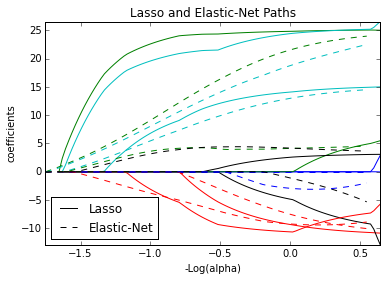

In [118]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Estandaricemos los datos

#Listos para hallar las trayectorias

eps = 5e-3  # mientras más chico, más grande es el path

print("Trayectoria de regularización mediante Lasso")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Trayectoria de regularización mediante Elastic Net")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

# Resultados

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


# Fuente: Alexandre Gramfort <alexandre.gramfort@inria.fr>

## Pseudocódigo de Elastic Net mediante Univariate Soft Thresholding 
**1.** Fijamos lambdas

**2.** Inicializamos betas

**3.** while dist > $threshold$

**4.**  $\forall k \in \{x_1, …, x_P\}$ (for k in range($P$))

**5.** Calculamos residuos excluyendo el regresor k
$$    
    r_{-k} = y - x_{-k}\beta_{-k}
$$ 


**6.** OLS simple de k
$$    
    \beta^*_{k} = \frac{1}{N} r_{-k}'x_k = \frac{1}{N} \sum_j r_{-k,j}x_{jk}
$$

**7.** Actualizamos beta mediante la regla de actualización de naive elastic net (única diferencia entre Lasso y Elastic Net)

$$\hat{\beta_k} = \Big( \frac{\beta_{k-1}-\frac{\lambda_1}{2}}{1+\lambda_2}\Big)_{+}sgn(\beta_{k-1})$$

**7'.** Reescalamos para quitar el sesgo:
$$\hat{\beta_{EN}} = (1+\lambda_2)\beta_k$$
**8.** $d = \beta_{k} - \beta_{k-1}$ (actualizamos distancia)

Es importante resaltar que UST ignora la dependencia que hay entre predictores. Es decir, los trata como coeficientes de una regresión univariada.